<a href="https://colab.research.google.com/github/Meriam-Victor/CIFAR10-Classification_using_CNNs/blob/main/CIFAR10_Classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense, Input, AveragePooling2D, Activation, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170498071/170498071 [==============================] - 4s 0us/step
Shape of x_train is (45000, 32, 32, 3)
Shape of x_test is (5000, 32, 32, 3)
Shape of y_train is (45000, 1)
Shape of y_test is (5000, 1)


In [ ]:
x_train = x_train/255
x_test = x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

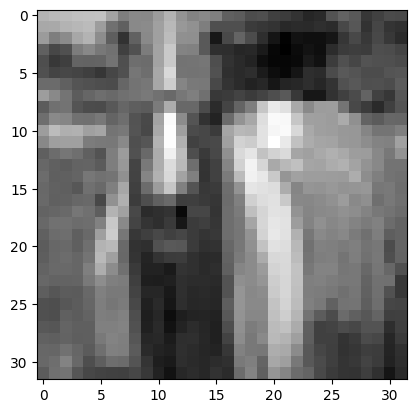

In [ ]:
plt.imshow(x_train[100][:,:,0],cmap='gray')#,cmap='grayscale' google greyscale in matplot
plt.show()

In [ ]:
print(y_train[100])
print(y_train_cat[100])

[7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(f"Shape of train_X: {x_train.shape}")
print(f"Shape of y_train: {y_train_cat.shape}")

Shape of train_X: (45000, 32, 32, 3)
Shape of y_train: (45000, 10)


In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  return input_images

train_X = preprocess_image_input(x_train)
valid_X = preprocess_image_input(x_test)

In [ ]:
print('Shape of x_train is {}'.format(train_X.shape))
print('Shape of x_test is {}'.format(valid_X.shape))
print('Shape of y_train is {}'.format(y_train_cat.shape))
print('Shape of y_test is {}'.format(y_test_cat.shape))

Shape of x_train is (45000, 32, 32, 3)
Shape of x_test is (5000, 32, 32, 3)
Shape of y_train is (45000, 10)
Shape of y_test is (5000, 10)


In [ ]:
print(f"Shape of train_X: {train_X.shape}")
print(f"Shape of y_train: {y_train_cat.shape}")

Shape of train_X: (45000, 32, 32, 3)
Shape of y_train: (45000, 10)


In [ ]:
num_classes = 10

# Feature Extraction
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# ResNet50 pretrained on imagenet weights
resnet_feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(32, 32, 3),
                                                                 include_top=False,
                                                                 weights='imagenet')(inputs)
# Global average pooling, Flatten and Dense layers
x = tf.keras.layers.GlobalAveragePooling2D()(resnet_feature_extractor)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)

# Output layer
classification_output = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

# Define and compile model
model = tf.keras.Model(inputs=inputs, outputs=classification_output)




model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               1049088   
                                                                 
 dense_29 (Dense)            (None, 64)                32832     
                                                           

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
print(f"Shape of train_X: {train_X.shape}")
print(f"Shape of y_train: {y_train_cat.shape}")

Shape of train_X: (45000, 32, 32, 3)
Shape of y_train: (45000, 10)


In [ ]:
batch_size = 64
epochs = 40
history = model.fit(train_X, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data = (valid_X, y_test_cat),
                    callbacks=[callbacks])

Epoch 1/40
704/704 [==============================] - 66s 53ms/step - loss: 1.3435 - acc: 0.5440 - val_loss: 3.0009 - val_acc: 0.1976
Epoch 2/40
704/704 [==============================] - 36s 51ms/step - loss: 1.0744 - acc: 0.6343 - val_loss: 2.5440 - val_acc: 0.2654
Epoch 3/40
704/704 [==============================] - 36s 51ms/step - loss: 0.9634 - acc: 0.6704 - val_loss: 0.9809 - val_acc: 0.6698
Epoch 4/40
704/704 [==============================] - 36s 51ms/step - loss: 0.7302 - acc: 0.7554 - val_loss: 1.1828 - val_acc: 0.6534
Epoch 5/40
704/704 [==============================] - 36s 51ms/step - loss: 0.7193 - acc: 0.7604 - val_loss: 0.9484 - val_acc: 0.6882
Epoch 6/40
704/704 [==============================] - 35s 50ms/step - loss: 0.5893 - acc: 0.8030 - val_loss: 0.9853 - val_acc: 0.6994
Epoch 7/40
704/704 [==============================] - 35s 50ms/step - loss: 0.5191 - acc: 0.8270 - val_loss: 0.8245 - val_acc: 0.7420
Epoch 8/40
704/704 [==============================] - 35s 50ms

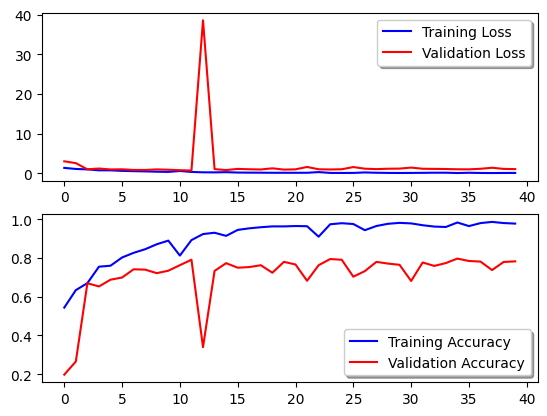

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)

157/157 [==============================] - 2s 10ms/step - loss: 1.0328 - acc: 0.7830
